Data Augmentation To Address Overfitting In Flower Classification CNN

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(
    'flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 65s 0us/step


In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

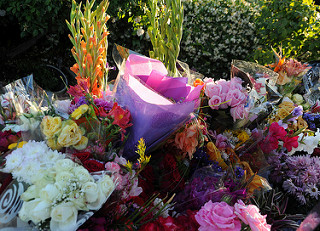

In [9]:
PIL.Image.open(str(roses[3]))

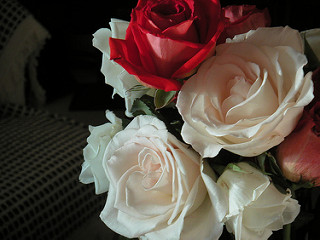

In [11]:
PIL.Image.open(str(roses[1]))

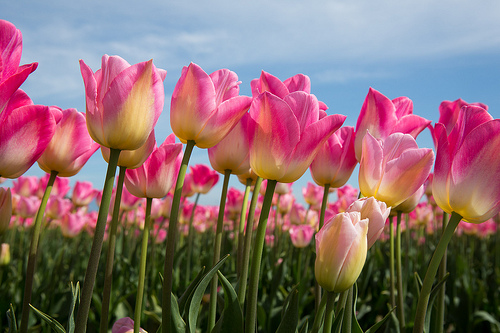

In [12]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[3]))

Read flowers images from disk into numpy array using opencv

In [13]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [14]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [15]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [16]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [17]:
img.shape

(240, 179, 3)

In [18]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [19]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180, 180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [20]:
X = np.array(X)
y = np.array(y)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [23]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 29s 323ms/step - loss: 1.2729 - accuracy: 0.4546
Epoch 2/30
86/86 [==============================] - 24s 275ms/step - loss: 0.9703 - accuracy: 0.6214
Epoch 3/30
86/86 [==============================] - 23s 270ms/step - loss: 0.7895 - accuracy: 0.7035
Epoch 4/30
86/86 [==============================] - 21s 250ms/step - loss: 0.5857 - accuracy: 0.7900
Epoch 5/30
86/86 [==============================] - 22s 262ms/step - loss: 0.3296 - accuracy: 0.8884
Epoch 6/30
86/86 [==============================] - 23s 264ms/step - loss: 0.1779 - accuracy: 0.9404
Epoch 7/30
86/86 [==============================] - 22s 259ms/step - loss: 0.0972 - accuracy: 0.9709
Epoch 8/30
86/86 [==============================] - 23s 267ms/step - loss: 0.0630 - accuracy: 0.9815
Epoch 9/30
86/86 [==============================] - 22s 253ms/step - loss: 0.0895 - accuracy: 0.9742
Epoch 10/30
86/86 [==============================] - 22s 254ms/step - loss: 0.0331 - accura

In [24]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 2s 71ms/step - loss: 2.2238 - accuracy: 0.6688


[2.2237706184387207, 0.6688452959060669]

In [25]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 2s 69ms/step


array([[ -1.3238001 ,  25.861473  ,   1.2538381 , -20.169983  ,
        -10.831982  ],
       [ 10.799327  ,  -4.735534  , -10.200048  ,  -7.2448764 ,
         -1.1156442 ],
       [ -1.9592162 ,   3.1384819 ,  12.917086  , -10.836529  ,
         -7.149117  ],
       ...,
       [  3.838718  ,  -3.767024  ,  -9.8704605 ,   1.4061414 ,
          4.992273  ],
       [  1.9487715 ,   2.6704679 ,   4.7880864 ,  -7.8451304 ,
         -7.7000227 ],
       [  2.7774796 , -16.546623  ,  -0.21482539,   6.5202193 ,
          2.7008412 ]], dtype=float32)

In [26]:
score = tf.nn.softmax(predictions[3])

In [27]:
np.argmax(score)

4

In [28]:
y_test[3]

4

Improve Test Accuracy Using Data Augmentation

In [30]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal",
                                                     input_shape=(180,
                                                                  180,
                                                                  3)),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1),
        layers.experimental.preprocessing.RandomContrast(0.2),
    ]
)

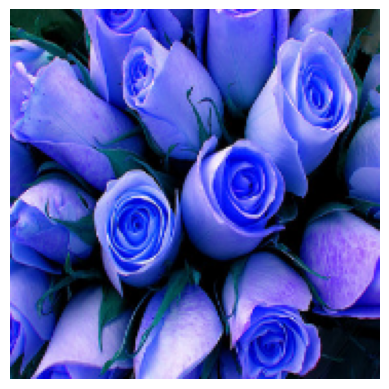

In [34]:
plt.axis('off')
plt.imshow(X[8])

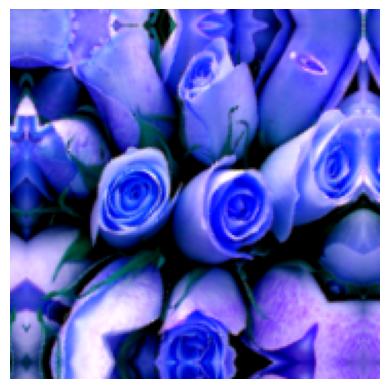

In [35]:
plt.axis('off')
plt.imshow(data_augmentation(X)[8].numpy().astype("uint8"))

using data augmentation and a drop out layer

In [36]:
num_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 33s 354ms/step - loss: 1.5217 - accuracy: 0.3648
Epoch 2/30
86/86 [==============================] - 29s 339ms/step - loss: 1.1212 - accuracy: 0.5418
Epoch 3/30
86/86 [==============================] - 29s 335ms/step - loss: 1.0131 - accuracy: 0.5967
Epoch 4/30
86/86 [==============================] - 29s 336ms/step - loss: 0.9430 - accuracy: 0.6250
Epoch 5/30
86/86 [==============================] - 29s 339ms/step - loss: 0.8836 - accuracy: 0.6559
Epoch 6/30
86/86 [==============================] - 29s 341ms/step - loss: 0.8271 - accuracy: 0.6911
Epoch 7/30
86/86 [==============================] - 30s 345ms/step - loss: 0.8233 - accuracy: 0.6806
Epoch 8/30
86/86 [==============================] - 29s 338ms/step - loss: 0.7715 - accuracy: 0.7104
Epoch 9/30
86/86 [==============================] - 29s 343ms/step - loss: 0.7258 - accuracy: 0.7264
Epoch 10/30
86/86 [==============================] - 29s 338ms/step - loss: 0.7183 - accura

In [37]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 2s 75ms/step - loss: 0.9138 - accuracy: 0.7211


[0.9137980937957764, 0.7211328744888306]